In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv('E:/Dataset/fake-news_dataset/train.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake-news detection/train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
# Getting independent features
X = df.drop('label', axis= 1)
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [5]:
# getting dependent features
y = df.label
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [6]:
df.shape

(20800, 5)

### We are going to use only CountVectorizer model 

In [7]:
#CountVectorizer:: bag of words
#TfidfVectorizer:: TFIDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [8]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# to remove NAN values
df = df.dropna() 

In [10]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
msg = df.copy()

In [12]:
msg.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
#to make proper indexing bcoz we see some of the records has dropped with numbers(eg: 6,8,etc)
msg.reset_index(inplace=True)

In [14]:
msg.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
msg['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #We used stemming technique 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
corpus = []
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['title'][i])
    review = review.lower()        #to make all alphabets in lower case
    review = review.split()        #to split the sentences in to words of lists
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [19]:
#apply countvectorizer::creating bag of words models
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [20]:
X.shape

(18285, 5000)

In [21]:
y = msg['label']
y.shape

(18285,)

In [22]:
# divide dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state = 0)

In [23]:
cv.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [24]:
#info about whatever algorithm we have defined regarding cv
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names())
count_df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_confusion_matrix(cm, classes, normalize=False, title="confusion matrix",cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tm = np.arange(len(classes))
    plt.xticks(tm, classes, rotation=45)
    plt.yticks(tm, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("confusion matrix without normalization")
        
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[1,j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

##  Multinomial Naive Bayes 

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [29]:
from sklearn import metrics
import numpy as np
import itertools

In [30]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [31]:
pred = classifier.predict(X_test)
pred

array([1, 1, 1, ..., 0, 0, 1])

In [32]:
score = metrics.accuracy_score(y_test, pred)
#print("Accuracy: %0.3f" %score)
print("Accuracy",score)

Accuracy 0.9019055509527755


confusion matrix without normalization


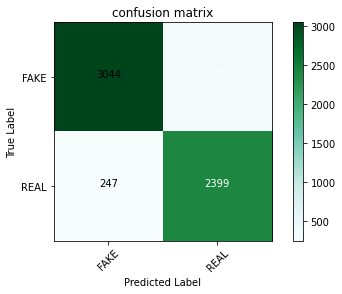

In [33]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Passive Aggressive Classifier 

In [34]:
def plot_confusion_matrix(cm, classes, normalize=True, title="confusion matrix",cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tm = np.arange(len(classes))
    plt.xticks(tm, classes, rotation=45)
    plt.yticks(tm, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("confusion matrix without normalization")
        
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[1,j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

Accuracy 0.9193040596520299
Normalized Confusion Matrix


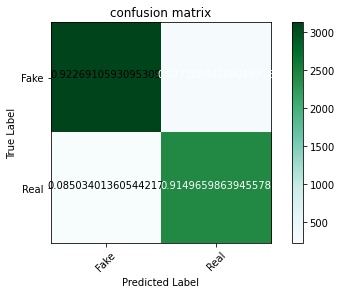

In [36]:
linear_clf.fit(X_train, y_train)
predi = linear_clf.predict(X_test)
scores = metrics.accuracy_score(y_test, predi)
print("Accuracy", scores)
cm = metrics.confusion_matrix(y_test, predi)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Multinomial Classifier with hyperparameter

In [37]:
classifier1 = MultinomialNB(alpha=0.1)

In [38]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_clf= MultinomialNB(alpha=alpha)
    sub_clf.fit(X_train, y_train)
    y_pred= sub_clf.predict(X_test)
    score= metrics.accuracy_score(y_test,y_pred)
    if score > previous_score:
        classifier1 = sub_clf
    print("Alpha:", alpha, "Score:", score)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0 Score: 0.8903065451532726
Alpha: 0.1 Score: 0.9020712510356255
Alpha: 0.2 Score: 0.9025683512841757
Alpha: 0.30000000000000004 Score: 0.9024026512013256
Alpha: 0.4 Score: 0.9017398508699255
Alpha: 0.5 Score: 0.9015741507870754
Alpha: 0.6000000000000001 Score: 0.9022369511184756
Alpha: 0.7000000000000001 Score: 0.9025683512841757
Alpha: 0.8 Score: 0.9015741507870754
Alpha: 0.9 Score: 0.9017398508699255


In [39]:
feature_names = cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
classifier1.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

In [41]:
#most Real words in 
sorted(zip(classifier1.coef_[0], feature_names), reverse=True)[:30]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america'),
 (-5.902965977905432, 'presid'),
 (-5.902965977905432, 'break'),
 (-5.902965977905432, 'american'),
 (-5.919787232395575, 'say'),
 (-5.980995145582579, 'state'),
 (-6.075494112579337, 'campaign'),
 (-6.085454354284392, 'wikileak'),
 (-6.085454354284392, 'get'),
 (-6.11594452104218, 'call'),
 (-6.136800334323018, 'investig')]

In [42]:
#most Fake
sorted(zip(classifier1.coef_[0], feature_names))[:3000]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new'),
 (-10.794984555596727, 'american new york'),
 (-10.794984555596727, 'ami'),
 (-10.794984555596727, 'ami schumer'),
 (-10.794984555596727, 'amp'),
 (-10.794984555596727, 'ann'),
 (-10.794984555596727, 'ann coulter'),
 (-10.794984555596

# Now we need to see data by text 

In [43]:
corpus1 = []
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['text'][i])
    review = review.lower()        #to make all alphabets in lower case
    review = review.split()        #to split the sentences in to words of lists
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [44]:
corpus1

Output hidden; open in https://colab.research.google.com to view.

In [59]:
#apply countvectorizer::creating bag of words models
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=15000, ngram_range=(1,3))
X = cv.fit_transform(corpus1).toarray()

In [60]:
X.shape

(18285, 15000)

In [61]:
y = msg['label']
y.shape

(18285,)

In [62]:
# divide dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state = 0)

In [63]:
cv.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'aaron klein',
 'ab',
 'abadi',
 'abandon',
 'abba',
 'abbott',
 'abc',
 'abc news',
 'abd',
 'abdel',
 'abduct',
 'abdullah',
 'abe',
 'abedin',
 'aber',
 'abid',
 'abil',
 'abl',
 'abl get']

In [64]:
#info about whatever algorithm we have defined regarding cv
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 15000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

## Using Multinomial NB

In [65]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [66]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [67]:
pred = classifier.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 1])

In [68]:
score = metrics.accuracy_score(y_test, pred)
#print("Accuracy: %0.3f" %score)
print("Accuracy",score)

Accuracy 0.9189726594863298


Normalized Confusion Matrix


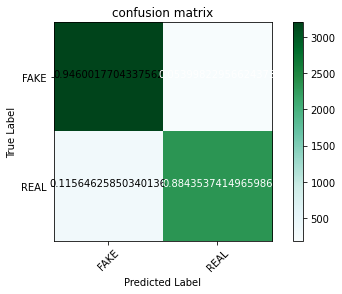

In [69]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Passive aggressive classifier (text)

Accuracy 0.943993371996686
Normalized Confusion Matrix


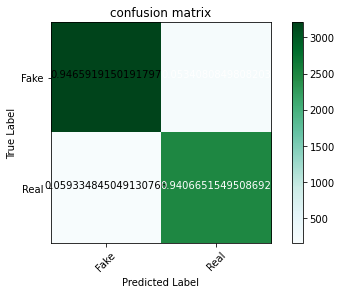

In [70]:
linear_clf.fit(X_train, y_train)
predi = linear_clf.predict(X_test)
scores = metrics.accuracy_score(y_test, predi)
print("Accuracy", scores)
cm = metrics.confusion_matrix(y_test, predi)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## MultinomialNB classifier with hyperparameter (text)

In [71]:
classifier1 = MultinomialNB(alpha=0.1)

In [72]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_clf= MultinomialNB(alpha=alpha)
    sub_clf.fit(X_train, y_train)
    y_pred= sub_clf.predict(X_test)
    score= metrics.accuracy_score(y_test,y_pred)
    if score > previous_score:
        classifier1 = sub_clf
    print("Alpha:", alpha, "Score:", score)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0 Score: 0.927754763877382
Alpha: 0.1 Score: 0.9207953603976802
Alpha: 0.2 Score: 0.9207953603976802
Alpha: 0.30000000000000004 Score: 0.9202982601491301
Alpha: 0.4 Score: 0.91996685998343
Alpha: 0.5 Score: 0.9194697597348799
Alpha: 0.6000000000000001 Score: 0.9193040596520299
Alpha: 0.7000000000000001 Score: 0.9191383595691798
Alpha: 0.8 Score: 0.9189726594863298
Alpha: 0.9 Score: 0.9189726594863298


In [73]:
feature_names1 = cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
classifier1.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-10.79560648, -12.18875801, -11.08404814, ...,  -9.51555888,
       -10.94256969, -10.05681977])

In [78]:
#most fake words in 'text' feature of news
sorted(zip(classifier1.coef_[0], feature_names1))[:3000]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-14.682881317244249, 'accord mr'),
 (-14.682881317244249, 'ackman'),
 (-14.682881317244249, 'action mr'),
 (-14.682881317244249, 'advis mr'),
 (-14.682881317244249, 'advis mr trump'),
 (-14.682881317244249, 'ago mr'),
 (-14.682881317244249, 'ahca'),
 (-14.682881317244249, 'airbag'),
 (-14.682881317244249, 'albritton'),
 (-14.682881317244249, 'aljahmi'),
 (-14.682881317244249, 'alli mr'),
 (-14.682881317244249, 'also polit analyst'),
 (-14.682881317244249, 'amend columnist'),
 (-14.682881317244249, 'amend columnist breitbart'),
 (-14.682881317244249, 'american radio follow'),
 (-14.682881317244249, 'amri'),
 (-14.682881317244249, 'analyst arm'),
 (-14.682881317244249, 'analyst arm american'),
 (-14.682881317244249, 'anbang'),
 (-14.682881317244249, 'antidop'),
 (-14.682881317244249, 'appear order reader'),
 (-14.682881317244249, 'argu mr'),
 (-14.682881317244249, 'arm american radio'),
 (-14.682881317244249, 'around mr'),
 (-14.682881317244249, 'associ editor senior'),
 (-14.682881317

In [83]:
#most fake words in 'text' feature of news
sorted(zip(classifier1.coef_[0], feature_names1),reverse=True)[:3000]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-5.221272197042824, 'trump'),
 (-5.253325097291835, 'clinton'),
 (-5.400023920540004, 'peopl'),
 (-5.4104115738025165, 'one'),
 (-5.468670666689967, 'state'),
 (-5.544406987980288, 'us'),
 (-5.554365795570396, 'would'),
 (-5.667083542358975, 'like'),
 (-5.67821301567027, 'hillari'),
 (-5.702387466933731, 'time'),
 (-5.78119699744817, 'elect'),
 (-5.79153787945023, 'year'),
 (-5.845554997605737, 'said'),
 (-5.85593475962092, 'american'),
 (-5.918671810102245, 'new'),
 (-5.960500374911778, 'use'),
 (-5.966673346092396, 'also'),
 (-5.970688023285225, 'presid'),
 (-5.99418412767241, 'world'),
 (-5.998875095857219, 'go'),
 (-6.01690420226176, 'even'),
 (-6.025559101077379, 'govern'),
 (-6.065963461788813, 'war'),
 (-6.069388536660698, 'make'),
 (-6.090807436424159, 'say'),
 (-6.105555128106873, 'get'),
 (-6.130771533924451, 'mani'),
 (-6.1378784251887435, 'vote'),
 (-6.16526599271651, 'right'),
 (-6.171952148361077, 'nation'),
 (-6.205376503875028, 'report'),
 (-6.209082871480536, 'obama'

We used MultinomialNB, PassiveAggressiveClassifier, MultinomialNB Hyperparameters 
Here, We have got better accuracies 91.93% and 94.39% using passive aggressive classifier wrt['title'] and ['text'] features of the dataset respectively